In [1]:
import pathlib
import json
import copy

import pandas as pd
import geopandas as gpd
import numpy as np

import dtv_backend.chart_templates
import dtv_backend.charts

/Users/baart_f/.virtualenvs/main/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = pathlib.Path('../../dtv_backend/tests/user/2022-09-08-result.json')

In [3]:
with open(path) as f:
    results = json.load(f)

#### KPI trip duration

In [4]:
echart = dtv_backend.charts.trip_duration(results)
print(json.dumps(echart))

{"title": {"text": "Trip duration", "subtext": "Example data"}, "tooltip": {"trigger": "axis", "axisPointer": {"type": "cross"}}, "toolbox": {"show": true, "feature": {"saveAsImage": {}}}, "xAxis": {"type": "category", "boundaryGap": true, "data": [0, 1, 2, 3, 4, 5, 6]}, "yAxis": {"type": "value", "axisLabel": {"formatter": "{value}"}, "axisPointer": {"snap": true}}, "visualMap": {"show": true, "dimension": 1, "pieces": [{"lte": 32.98, "color": "green"}, {"gt": 32.98, "color": "red"}]}, "series": [{"name": "Trip duration", "type": "scatter", "data": [13.091111111111111, 5.010555555555555, 5.010555555555555, 5.010555555555555, 5.010277777777778, 5.010555555555555, 5.010555555555555]}]}


#### KPI duration breakdown

In [10]:
echart = dtv_backend.charts.duration_breakdown(results)
print(json.dumps(echart))

{"tooltip": {"trigger": "item", "formatter": "{b} : {c}h ({d}%)"}, "legend": {"orient": "vertical", "left": "left", "data": ["Sailing", "Load"]}, "series": [{"name": "Duration breakdown", "type": "pie", "radius": "80%", "center": ["50%", "50%"], "data": [{"value": 8.080555555555556, "name": "Load"}, {"value": 35.07361111111111, "name": "Sailing"}], "emphasis": {"itemStyle": {"shadowBlur": 10, "shadowOffsetX": 0, "shadowColor": "rgba(0, 0, 0, 0.5)"}}}]}


#### KPI trips

What is intended to be shown here?

In [9]:
gdf = gpd.GeoDataFrame.from_features(results["log"]["features"])

cycle_idx = np.logical_and(
    gdf["Actor type"] == "Ship", gdf["Name"] == "Cycle")
selected = gdf[cycle_idx].reset_index(drop=True)
echart = copy.deepcopy(dtv_backend.chart_templates.trip_duration_template)
echart["xAxis"]["data"] = selected.index.tolist()
durations = pd.to_datetime(
    selected["Stop"]) - pd.to_datetime(selected["Start"])
hours = durations.dt.total_seconds() / 3600

bins = np.histogram_bin_edges(hours, bins='sturges' )
bins = np.ceil(bins)

# make numbers prettier
bins = np.unique(np.ceil(bins)).astype('int')
min_hours = np.floor(hours.min()).astype('int')
print(min_hours)
counts, bins = np.histogram(hours.tolist(), [min_hours] +  bins.tolist())

counts, bins


5


(array([6, 0, 0, 0, 1]), array([ 5,  6,  8, 10, 12, 14]))

<AxesSubplot:>

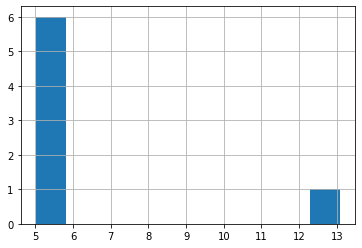

In [7]:
hours.hist()

In [8]:
echart = dtv_backend.charts.trips(results)
echart['xAxis']['data'] = bins.tolist()
echart['series'][0]['data'] = counts.tolist()
print(json.dumps(echart, indent=2))

{
  "xAxis": {
    "name": "Duration",
    "type": "category",
    "boundaryGap": false,
    "data": [
      5,
      6,
      8,
      10,
      12,
      14
    ]
  },
  "yAxis": {
    "type": "value",
    "name": "Count"
  },
  "legend": {
    "data": [
      "Duration [h]"
    ]
  },
  "series": [
    {
      "name": "Duration [h]",
      "data": [
        6,
        0,
        0,
        0,
        1
      ],
      "type": "bar",
      "barWidth": "99.3%"
    }
  ]
}


#### KPI TON km

WIP